### Data analysis for Full-DIA's result on Mixture dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'Arial'

#### Check analysis time

In [2]:
report_dir = Path('../../reports/Mixture')

from datetime import timedelta
with open(report_dir/'full_100'/'report.log.txt') as f:
    lines = f.readlines()
    time_str = lines[-1].split(' ')[0][:-1]
    h, m, s = map(int, time_str.split(':'))
    duration = timedelta(hours=h, minutes=m, seconds=s)
    total_minutes = duration.total_seconds()/60.
    n = int(lines[-14].split(' ')[2])
    t_mean = total_minutes / n
print(f'#runs: {n}, Minutes/Run: {t_mean:.2f}')

#runs: 6, Minutes/Run: 13.86


#### Check the report.parquet
1. #ids
2. miss rate

In [3]:
df_raw = pd.read_parquet(report_dir/'full_100'/'report.parquet')
n_pgs = df_raw[df_raw['Global.PG.Q.Value'] < 0.01]['Protein.Group'].nunique()
n_prs = df_raw[df_raw['Global.Q.Value'] < 0.01]['Precursor.Id'].nunique()
print(f'Global n_prs: {n_prs}, Global n_pgs: {n_pgs}')

df_raw['species'] = df_raw['Protein.Names'].apply(
        lambda row: ';'.join(
            set([part.split('_')[1] for part in row.split(';')]))
    )
df_raw = df_raw[df_raw['species'].str.count(';') == 0]

Global n_prs: 69825, Global n_pgs: 6115


#### No DeepQuant

##### Precursor level

In [4]:
# matrix
df_pr = df_raw[(df_raw['Global.Q.Value'] < 0.01)]
df_pr = df_pr[['species', 'Precursor.Id', 'Run', 'Precursor.Quantity.Raw']]
df_pr = df_pr.drop_duplicates().reset_index(drop=True)
df_pr = df_pr.pivot(index=['species', 'Precursor.Id'],
                columns='Run',
                values='Precursor.Quantity.Raw')
miss = df_pr.isna().sum().sum() / df_pr.shape[0] / df_pr.shape[1]
df_pr.columns.name = None
df_pr.index.name = None
df_pr = df_pr.reset_index()

print(f'Global FDR filtering, shape: {df_pr.shape}, miss: {miss:.2f}')
print(df_pr.columns)
df_pr.copy()

Global FDR filtering, shape: (69825, 8), miss: 0.00
Index(['species', 'Precursor.Id',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Precursor.Id,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,AAADEWDER2,1.205848e+05,1.190610e+05,1.203297e+05,1.606306e+05,1.733906e+05,1.173394e+05
1,ECOLI,AAADVQLR2,5.204766e+04,1.159844e+04,4.397866e+04,7.693091e+04,7.878098e+04,1.606171e+05
2,ECOLI,AAAEGEMK2,4.006410e+04,1.240153e+04,2.540211e+04,3.149839e+04,3.093435e+04,1.948102e+04
3,ECOLI,AAAESSIQVK2,4.160807e+04,4.298407e+04,4.394494e+04,6.388150e+04,6.837166e+04,4.204183e+04
4,ECOLI,AAAFEGELIPASQIDR2,7.840341e+05,6.021314e+05,7.727961e+05,1.154370e+06,1.157186e+06,1.134542e+06
...,...,...,...,...,...,...,...,...
69820,HUMAN,YYVSPSDLLDDK2,3.062661e+04,1.951231e+04,3.140191e+04,4.403867e+04,1.511528e+04,2.066286e+04
69821,HUMAN,YYVTIIDAPGHR2,2.949325e+06,2.453659e+06,2.813140e+06,2.638614e+06,2.478226e+06,2.662790e+06
69822,HUMAN,YYVTIIDAPGHR3,3.011580e+06,2.157083e+06,3.099170e+06,2.649208e+06,2.704010e+06,2.367164e+06
69823,HUMAN,YYYAVVDC(UniMod:4)DSPETASK2,1.262499e+04,1.288896e+04,9.553151e+03,6.054564e+03,1.163791e+04,1.097103e+04


In [5]:
# merge replicates
df_pr['quant_pr_1'] = df_pr.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pr['quant_pr_2'] = df_pr.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pr['ratio'] = np.log2(df_pr['quant_pr_1'] / df_pr['quant_pr_2'])
df_pr['x'] = np.log2(df_pr['quant_pr_2'])
truth_ratio = 500 / 333

n_human = sum(df_pr['species'] == 'HUMAN')
n_ecoli = sum(df_pr['species'] != 'HUMAN')
median_human = df_pr.loc[df_pr['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pr.loc[df_pr['species'] != 'HUMAN', 'ratio'].median()
print('Human on Precursor Level:')
print(f'prs_n: {n_human}, prs_median: {median_human:.3f}')
print('ECOLI on Precursor Level:')
print(f'prs_n: {n_ecoli}, prs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Precursor Level:
prs_n: 59016, prs_median: -0.088
ECOLI on Precursor Level:
prs_n: 10809, prs_median: 0.503
Expected ratio: 0.586


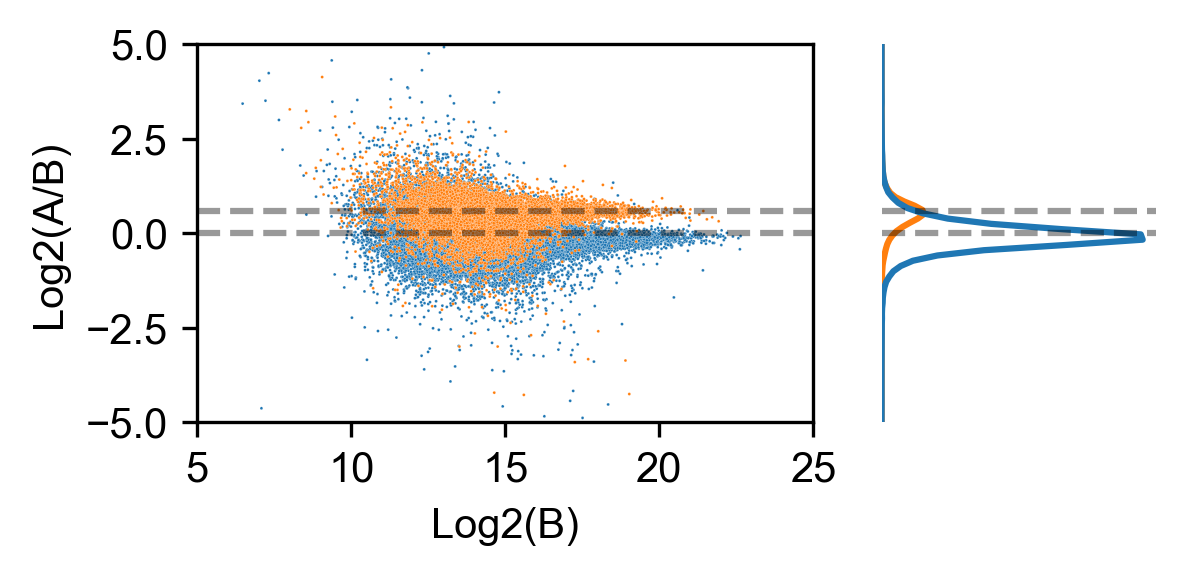

In [6]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pr = df_pr[::-1]
# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pr,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_xlim(5, 25)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pr,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

##### Protein Group Level

In [7]:
# matrix
df_pg = df_raw[(df_raw['Global.PG.Q.Value'] < 0.01)]
df_pg = df_pg[['species', 'Protein.Group', 'Run', 'PG.Quantity.Raw']]
df_pg = df_pg.drop_duplicates().reset_index(drop=True)
df_pg = df_pg.pivot(index=['species', 'Protein.Group'],
                columns='Run',
                values='PG.Quantity.Raw')
miss = df_pg.isna().sum().sum() / df_pg.shape[0] / df_pg.shape[1]
df_pg.columns.name = None
df_pg.index.name = None
df_pg = df_pg.reset_index()

print(f'Global FDR filtering, shape: {df_pg.shape}, miss: {miss:.2f}')
print(df_pg.columns)
df_pg.copy()

Global FDR filtering, shape: (6115, 8), miss: 0.00
Index(['species', 'Protein.Group',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Protein.Group,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,P00350,14305.963867,7024.922852,15983.313477,11302.945312,20671.156250,16336.852539
1,ECOLI,P00363,45856.906250,33380.414062,28503.134766,50424.695312,50666.472656,32327.564453
2,ECOLI,P00370,11900.280273,9840.402344,12829.502930,20652.503906,25474.761719,20002.378906
3,ECOLI,P00393,42537.093750,37342.929688,30977.535156,49211.089844,46512.164062,51816.687500
4,ECOLI,P00448,14448.978516,12468.571289,12321.958984,19821.333984,23850.248047,23060.667969
...,...,...,...,...,...,...,...,...
6110,HUMAN,Q9Y6W5,30913.437500,30626.472656,35441.710938,31719.265625,38587.707031,25594.587891
6111,HUMAN,Q9Y6X3,8762.939453,4486.112793,16195.121094,10055.355469,7929.112305,8390.663086
6112,HUMAN,Q9Y6X9,10231.916016,8131.544922,20790.435547,14986.412109,11039.125000,18911.130859
6113,HUMAN,Q9Y6Y0,41464.902344,23123.894531,41222.472656,21550.667969,48558.007812,40510.714844


In [8]:
# merge replicates
df_pg['quant_pg_1'] = df_pg.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pg['quant_pg_2'] = df_pg.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pg['ratio'] = np.log2(df_pg['quant_pg_1'] / df_pg['quant_pg_2'])
df_pg['x'] = np.log2(df_pg['quant_pg_2'])
truth_ratio = 500 / 333

n_human = sum(df_pg['species'] == 'HUMAN')
n_ecoli = sum(df_pg['species'] != 'HUMAN')
median_human = df_pg.loc[df_pg['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pg.loc[df_pg['species'] != 'HUMAN', 'ratio'].median()
print('Human on Protein Group Level:')
print(f'pgs_n: {n_human}, pgs_median: {median_human:.3f}')
print('ECOLI on Protein Group Level:')
print(f'pgs_n: {n_ecoli}, pgs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Protein Group Level:
pgs_n: 4938, pgs_median: -0.068
ECOLI on Protein Group Level:
pgs_n: 1177, pgs_median: 0.558
Expected ratio: 0.586


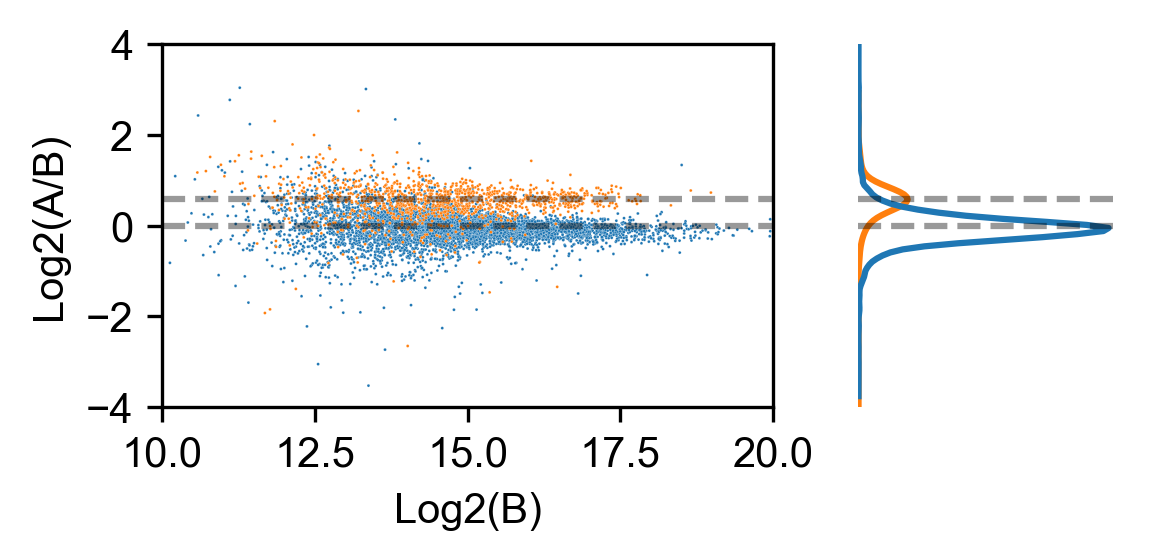

In [9]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pg = df_pg[::-1]

# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pg,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_xlim(10, 20)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pg,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

#### DeepQuant - Training on species level

##### Precursor level

In [10]:
# matrix
df_pr = df_raw[(df_raw['Global.Q.Value'] < 0.01)]
df_pr = df_pr[['species', 'Precursor.Id', 'Run', 'Precursor.Quantity.Deep']]
df_pr = df_pr.drop_duplicates().reset_index(drop=True)
df_pr = df_pr.pivot(index=['species', 'Precursor.Id'],
                    columns='Run',
                    values='Precursor.Quantity.Deep')
miss = df_pr.isna().sum().sum() / df_pr.shape[0] / df_pr.shape[1]
df_pr.columns.name = None
df_pr.index.name = None
df_pr = df_pr.reset_index()

print(f'Global FDR filtering, shape: {df_pr.shape}, miss: {miss:.2f}')
print(df_pr.columns)
df_pr.copy()

Global FDR filtering, shape: (69825, 8), miss: 0.00
Index(['species', 'Precursor.Id',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Precursor.Id,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,AAADEWDER2,1.006145e+05,9.875197e+04,1.069987e+05,1.460611e+05,1.437906e+05,1.434145e+05
1,ECOLI,AAADVQLR2,5.744943e+04,5.802080e+04,6.008849e+04,9.526960e+04,8.645028e+04,8.691203e+04
2,ECOLI,AAAEGEMK2,1.722386e+04,1.540120e+04,1.726708e+04,2.625678e+04,2.450250e+04,2.347372e+04
3,ECOLI,AAAESSIQVK2,2.904802e+04,2.580513e+04,3.016523e+04,4.521997e+04,4.789991e+04,4.303609e+04
4,ECOLI,AAAFEGELIPASQIDR2,5.049892e+05,4.844116e+05,5.223373e+05,7.467795e+05,7.805454e+05,7.761294e+05
...,...,...,...,...,...,...,...,...
69820,HUMAN,YYVSPSDLLDDK2,1.794462e+04,2.029415e+04,2.915895e+04,2.497497e+04,1.167992e+04,1.996024e+04
69821,HUMAN,YYVTIIDAPGHR2,2.162298e+06,1.958241e+06,2.386988e+06,2.197450e+06,2.002074e+06,2.011978e+06
69822,HUMAN,YYVTIIDAPGHR3,1.864760e+06,1.671148e+06,1.973029e+06,1.676154e+06,1.639512e+06,1.542807e+06
69823,HUMAN,YYYAVVDC(UniMod:4)DSPETASK2,9.082763e+03,5.891046e+03,1.370919e+04,1.063057e+04,9.784146e+03,8.732348e+03


In [11]:
# merge replicates
df_pr['quant_pr_1'] = df_pr.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pr['quant_pr_2'] = df_pr.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pr['ratio'] = np.log2(df_pr['quant_pr_1'] / df_pr['quant_pr_2'])
df_pr['x'] = np.log2(df_pr['quant_pr_2'])
truth_ratio = 500 / 333

n_human = sum(df_pr['species'] == 'HUMAN')
n_ecoli = sum(df_pr['species'] != 'HUMAN')
median_human = df_pr.loc[df_pr['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pr.loc[df_pr['species'] != 'HUMAN', 'ratio'].median()
print('Human on Precursor Level:')
print(f'prs_n: {n_human}, prs_median: {median_human:.3f}')
print('ECOLI on Precursor Level:')
print(f'prs_n: {n_ecoli}, prs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Precursor Level:
prs_n: 59016, prs_median: -0.063
ECOLI on Precursor Level:
prs_n: 10809, prs_median: 0.559
Expected ratio: 0.586


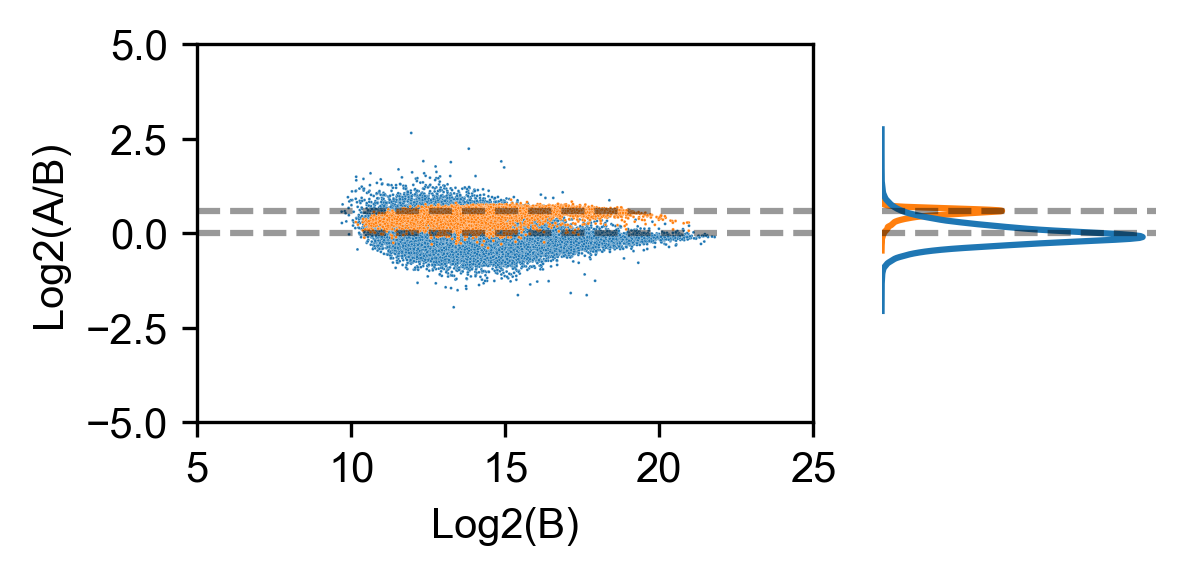

In [12]:
# plot
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pr = df_pr[::-1]
# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pr,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_xlim(5, 25)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pr,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

##### Protein Group Level

In [13]:
# matrix
df_pg = df_raw[(df_raw['Global.PG.Q.Value'] < 0.01)]
df_pg = df_pg[['species', 'Protein.Group', 'Run', 'PG.Quantity.Deep']]
df_pg = df_pg.drop_duplicates().reset_index(drop=True)
df_pg = df_pg.pivot(index=['species', 'Protein.Group'],
                    columns='Run',
                    values='PG.Quantity.Deep')
miss = df_pg.isna().sum().sum() / df_pg.shape[0] / df_pg.shape[1]
df_pg.columns.name = None
df_pg.index.name = None
df_pg = df_pg.reset_index()

print(f'Global FDR filtering, shape: {df_pg.shape}, miss: {miss:.2f}')
print(df_pg.columns)
df_pg.copy()

Global FDR filtering, shape: (6115, 8), miss: 0.00
Index(['species', 'Protein.Group',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Protein.Group,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,P00350,9361.236328,8021.715820,10074.949219,14635.767578,14878.654297,12280.430664
1,ECOLI,P00363,27601.693359,23441.484375,28229.589844,42542.281250,41245.535156,41613.812500
2,ECOLI,P00370,11443.554688,9205.999023,12665.177734,16815.259766,17179.683594,15707.876953
3,ECOLI,P00393,37053.679688,32254.601562,38227.546875,52436.234375,59130.140625,54551.898438
4,ECOLI,P00448,13128.778320,10384.688477,13894.695312,19050.332031,20072.246094,18241.667969
...,...,...,...,...,...,...,...,...
6110,HUMAN,Q9Y6W5,31923.082031,31237.953125,33360.679688,26574.367188,26965.992188,25371.341797
6111,HUMAN,Q9Y6X3,8740.381836,4541.591309,16989.404297,9313.997070,8426.404297,6898.398926
6112,HUMAN,Q9Y6X9,10645.798828,6577.897461,14429.693359,13181.154297,14845.193359,10588.768555
6113,HUMAN,Q9Y6Y0,30278.753906,24038.728516,31441.421875,25700.029297,37070.968750,33529.406250


In [14]:
# merge replicates
df_pg['quant_pg_1'] = df_pg.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pg['quant_pg_2'] = df_pg.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pg['ratio'] = np.log2(df_pg['quant_pg_1'] / df_pg['quant_pg_2'])
df_pg['x'] = np.log2(df_pg['quant_pg_2'])
truth_ratio = 500 / 333

n_human = sum(df_pg['species'] == 'HUMAN')
n_ecoli = sum(df_pg['species'] != 'HUMAN')
median_human = df_pg.loc[df_pg['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pg.loc[df_pg['species'] != 'HUMAN', 'ratio'].median()
print('Human on Protein Group Level:')
print(f'pgs_n: {n_human}, pgs_median: {median_human:.3f}')
print('ECOLI on Protein Group Level:')
print(f'pgs_n: {n_ecoli}, pgs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Protein Group Level:
pgs_n: 4938, pgs_median: -0.074
ECOLI on Protein Group Level:
pgs_n: 1177, pgs_median: 0.590
Expected ratio: 0.586


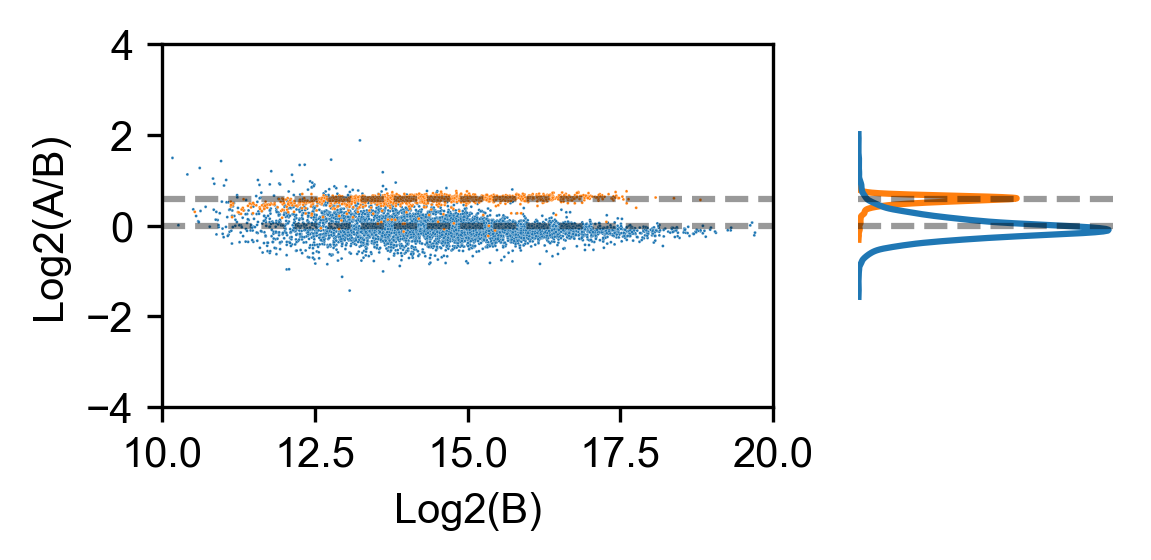

In [15]:
# plot
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pg = df_pg[::-1]

# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pg,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_xlim(10, 20)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pg,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

#### DeepQuant - Training as a whole

##### Precursor level

In [16]:
df_raw = pd.read_parquet(report_dir/'full_100_nospecies'/'report.parquet')
df_raw['species'] = df_raw['Protein.Names'].apply(
        lambda row: ';'.join(
            set([part.split('_')[1] for part in row.split(';')]))
    )
df_raw = df_raw[df_raw['species'].str.count(';') == 0]

# matrix
df_pr = df_raw[(df_raw['Global.Q.Value'] < 0.01)]
df_pr = df_pr[['species', 'Precursor.Id', 'Run', 'Precursor.Quantity.Deep']]
df_pr = df_pr.drop_duplicates().reset_index(drop=True)
df_pr = df_pr.pivot(index=['species', 'Precursor.Id'],
                columns='Run',
                values='Precursor.Quantity.Deep')
miss = df_pr.isna().sum().sum() / df_pr.shape[0] / df_pr.shape[1]
df_pr.columns.name = None
df_pr.index.name = None
df_pr = df_pr.reset_index()

print(f'Global FDR filtering, shape: {df_pr.shape}, miss: {miss:.2f}')
print(df_pr.columns)
df_pr.copy()

Global FDR filtering, shape: (69825, 8), miss: 0.00
Index(['species', 'Precursor.Id',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Precursor.Id,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,AAADEWDER2,1.334106e+05,1.317526e+05,1.294774e+05,1.542785e+05,1.370544e+05,1.303590e+05
1,ECOLI,AAADVQLR2,4.321949e+04,3.425616e+04,4.640322e+04,7.076868e+04,5.065104e+04,1.331544e+05
2,ECOLI,AAAEGEMK2,1.816131e+04,2.250972e+04,1.794412e+04,2.812891e+04,2.468637e+04,2.165895e+04
3,ECOLI,AAAESSIQVK2,3.343009e+04,3.867901e+04,3.445242e+04,5.788440e+04,4.771925e+04,4.060897e+04
4,ECOLI,AAAFEGELIPASQIDR2,6.541266e+05,5.464837e+05,7.418991e+05,7.542034e+05,7.504981e+05,7.295519e+05
...,...,...,...,...,...,...,...,...
69820,HUMAN,YYVSPSDLLDDK2,1.573857e+04,2.959612e+04,2.680863e+04,2.854313e+04,1.636955e+04,2.141115e+04
69821,HUMAN,YYVTIIDAPGHR2,1.870263e+06,1.818583e+06,2.037334e+06,2.059164e+06,1.947517e+06,1.893123e+06
69822,HUMAN,YYVTIIDAPGHR3,1.730838e+06,1.669253e+06,1.817363e+06,1.808348e+06,1.688270e+06,1.584981e+06
69823,HUMAN,YYYAVVDC(UniMod:4)DSPETASK2,8.569885e+03,5.723178e+03,8.851361e+03,1.190087e+04,1.056196e+04,7.772150e+03


In [17]:
# merge replicates
df_pr['quant_pr_1'] = df_pr.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pr['quant_pr_2'] = df_pr.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pr['ratio'] = np.log2(df_pr['quant_pr_1'] / df_pr['quant_pr_2'])
df_pr['x'] = np.log2(df_pr['quant_pr_2'])
truth_ratio = 500 / 333

n_human = sum(df_pr['species'] == 'HUMAN')
n_ecoli = sum(df_pr['species'] != 'HUMAN')
median_human = df_pr.loc[df_pr['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pr.loc[df_pr['species'] != 'HUMAN', 'ratio'].median()
print('Human on Precursor Level:')
print(f'prs_n: {n_human}, prs_median: {median_human:.3f}')
print('ECOLI on Precursor Level:')
print(f'prs_n: {n_ecoli}, prs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Precursor Level:
prs_n: 59016, prs_median: 0.000
ECOLI on Precursor Level:
prs_n: 10809, prs_median: 0.340
Expected ratio: 0.586


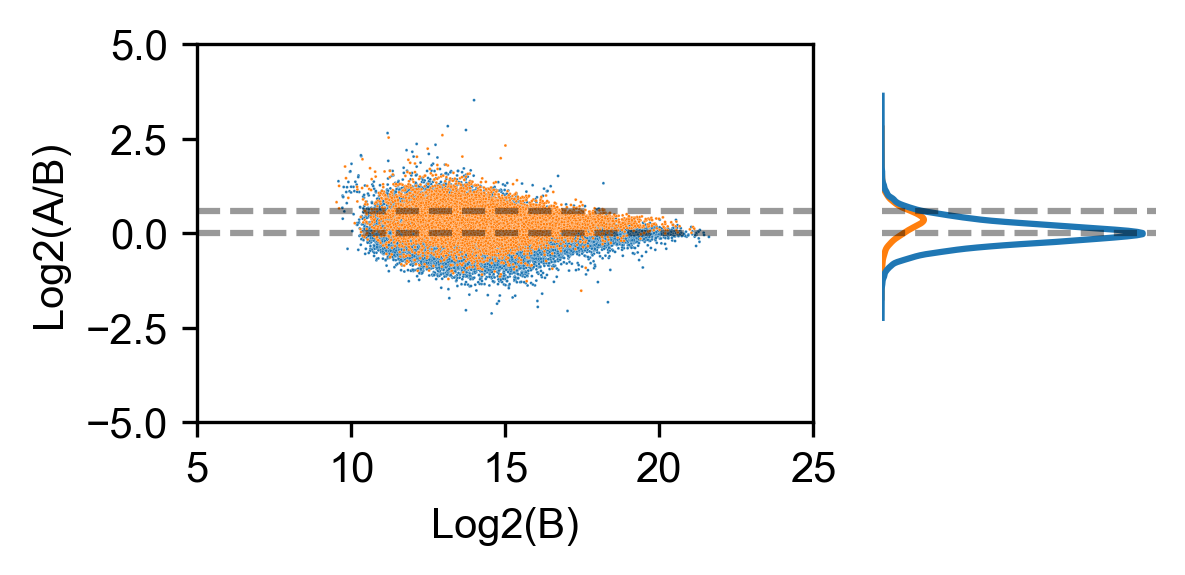

In [18]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pr = df_pr[::-1]
# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pr,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_xlim(5, 25)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pr,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-5, 5)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()

##### Protein Group Level

In [19]:
# matrix
df_pg = df_raw[(df_raw['Global.PG.Q.Value'] < 0.01)]
df_pg = df_pg[['species', 'Protein.Group', 'Run', 'PG.Quantity.Deep']]
df_pg = df_pg.drop_duplicates().reset_index(drop=True)
df_pg = df_pg.pivot(index=['species', 'Protein.Group'],
                columns='Run',
                values='PG.Quantity.Deep')
miss = df_pg.isna().sum().sum() / df_pg.shape[0] / df_pg.shape[1]
df_pg.columns.name = None
df_pg.index.name = None
df_pg = df_pg.reset_index()

print(f'Global FDR filtering, shape: {df_pg.shape}, miss: {miss:.2f}')
print(df_pg.columns)
df_pg.copy()

Global FDR filtering, shape: (6115, 8), miss: 0.00
Index(['species', 'Protein.Group',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419',
       '202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422',
       '202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423'],
      dtype='object')


,species,Protein.Group,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9418,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9419,202206012_K2E33_ZI_500ul60C3cm5min_P1-C5_1_9420,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9421,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9422,202206012_K2E50_ZI_500ul60C3cm5min_P1-D5_1_9423
0,ECOLI,P00350,11997.191406,6285.163086,15690.043945,13030.148438,14618.514648,14512.144531
1,ECOLI,P00363,40517.609375,29346.199219,32488.828125,45502.230469,47540.562500,33830.468750
2,ECOLI,P00370,14560.739258,8080.467285,15646.934570,21419.683594,21987.146484,12318.216797
3,ECOLI,P00393,38860.703125,36472.691406,38394.386719,50929.093750,45478.476562,53013.453125
4,ECOLI,P00448,14012.916016,12152.771484,14152.315430,21046.503906,19731.710938,20756.179688
...,...,...,...,...,...,...,...,...
6110,HUMAN,Q9Y6W5,35313.429688,34401.164062,39332.632812,30248.869141,29588.578125,23677.574219
6111,HUMAN,Q9Y6X3,9965.552734,5734.207520,16867.126953,8929.503906,8463.416992,9712.027344
6112,HUMAN,Q9Y6X9,11963.470703,6903.582031,14013.519531,14914.644531,13973.955078,13854.858398
6113,HUMAN,Q9Y6Y0,36940.742188,25485.214844,36675.566406,35475.058594,39240.531250,43583.804688


In [20]:
# merge replicates
df_pg['quant_pg_1'] = df_pg.iloc[:, 5:8].mean(axis=1) + 1e-6
df_pg['quant_pg_2'] = df_pg.iloc[:, 2:5].mean(axis=1) + 1e-6
df_pg['ratio'] = np.log2(df_pg['quant_pg_1'] / df_pg['quant_pg_2'])
df_pg['x'] = np.log2(df_pg['quant_pg_2'])
truth_ratio = 500 / 333

n_human = sum(df_pg['species'] == 'HUMAN')
n_ecoli = sum(df_pg['species'] != 'HUMAN')
median_human = df_pg.loc[df_pg['species'] == 'HUMAN', 'ratio'].median()
median_ecoli = df_pg.loc[df_pg['species'] != 'HUMAN', 'ratio'].median()
print('Human on Protein Group Level:')
print(f'pgs_n: {n_human}, pgs_median: {median_human:.3f}')
print('ECOLI on Protein Group Level:')
print(f'pgs_n: {n_ecoli}, pgs_median: {median_ecoli:.3f}')
print(f'Expected ratio: {np.log2(truth_ratio):.3f}')

Human on Protein Group Level:
pgs_n: 4938, pgs_median: 0.009
ECOLI on Protein Group Level:
pgs_n: 1177, pgs_median: 0.396
Expected ratio: 0.586


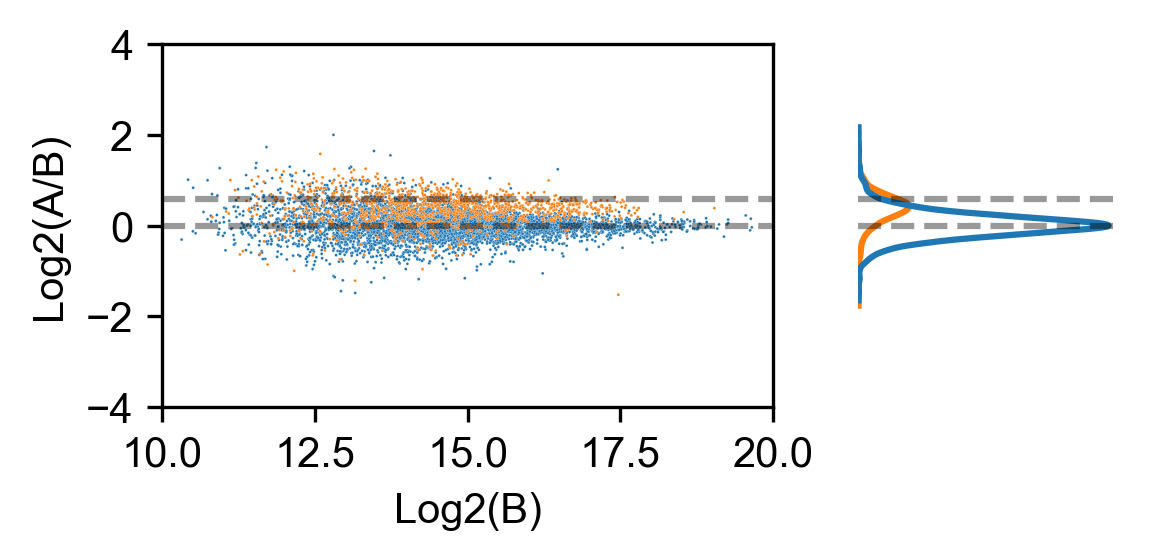

In [21]:
# plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10 / 2.54, 5 / 2.54))
grid = plt.GridSpec(1, 3)
df_pg = df_pg[::-1]

# scatter
color = u'#da5f02'
ax = plt.subplot(grid[0, 0:2])
sns.scatterplot(data=df_pg,
                x='x',
                y='ratio',
                hue='species',
                s=0.5,
                color=color,
                ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_xlim(10, 20)
ax.set_xlabel('Log2(B)')
ax.set_ylabel('Log2(A/B)')
ax.get_legend().remove()

# box
ax = plt.subplot(grid[0, 2])
sns.kdeplot(data=df_pg,
            y='ratio',
            hue='species',
            legend=False,
            ax=ax)
ax.axhline(y=0, linestyle='--', c='black', alpha=0.4)
ax.axhline(y=np.log2(truth_ratio), linestyle='--', c='black', alpha=0.4)
ax.set_ylim(-4, 4)
ax.set_yticklabels([])
ax.axis('off')
ax.set_frame_on(False)

plt.tight_layout()
plt.show()